<a href="https://colab.research.google.com/github/Suwannaket1/python_dataviz2024/blob/main/Final_Exam_%E0%B8%99_%E0%B8%AA_%E0%B8%AA%E0%B8%B8%E0%B8%A7%E0%B8%A3%E0%B8%A3%E0%B8%93%E0%B9%80%E0%B8%81%E0%B8%95%E0%B8%B8_%E0%B8%AA%E0%B8%B8%E0%B8%A1%E0%B8%B2%E0%B8%A5%E0%B8%B5_%E0%B8%A3%E0%B8%AB%E0%B8%B1%E0%B8%AA%E0%B8%99%E0%B8%B1%E0%B8%81%E0%B8%A8%E0%B8%B6%E0%B8%81%E0%B8%A9%E0%B8%B2_653020578_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**นางสาวสุวรรณเกตุ สุมาลี รหัสนักศึกษา 653020578-2**

#เตรียมข้อมูล

##Load data

In [69]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# เชื่อมต่อ Google Drive
drive.mount('/content/drive')

# โหลดข้อมูล
file_path = '/content/drive/MyDrive/Final Exam/Xnn_ppm.pickle'
with open(file_path, 'rb') as f:
    data = pickle.load(f)

# สมมติว่าข้อมูลถูกบันทึกเป็นทูเพิลที่มีสองสมาชิก
X, ppm = data

print("รูปร่างของ X:", X.shape)
print("รูปร่างของ ppm:", ppm.shape)

# ตรวจสอบข้อมูล
print("ตัวอย่างค่าใน X:", X[:5, :5])
print("ตัวอย่างค่าใน ppm:", ppm[:5])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
รูปร่างของ X: (51, 65536)
รูปร่างของ ppm: (65536,)
ตัวอย่างค่าใน X: [[13698496.87862849 13690427.85411995 12788968.23910642 12409425.7068441
  13303647.51422819]
 [ 8556799.93134524  7907584.55473726  7289756.67464252  6754655.33582104
   6380377.73006064]
 [ 4740352.          4740352.          4740352.          4740352.
   4740352.        ]
 [ 7544576.          7544576.          7544576.          7544576.
   7544576.        ]
 [11456256.         11456256.         11456256.         11456256.
  11456256.        ]]
ตัวอย่างค่าใน ppm: [10.87128    10.87109488 10.87090976 10.87072464 10.87053952]


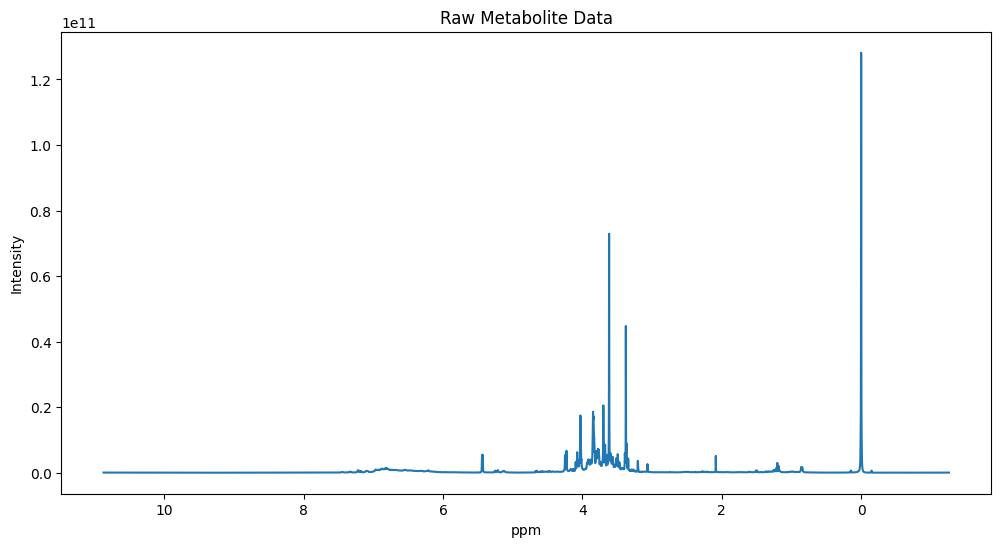

In [70]:
# แสดงกราฟข้อมูลดิบ
plt.figure(figsize=(12, 6))
plt.plot(ppm, X[0])
plt.xlabel('ppm')
plt.ylabel('Intensity')
plt.title('Raw Metabolite Data')
plt.gca().invert_xaxis()
plt.show()

## กรองข้อมูล โดยตัดข้อมูลที่อยู่นอกช่วงที่สนใจ (ppm <= 0 และ ppm >= 9.5)

In [71]:
# สร้างมาสก์สำหรับค่า ppm ที่เราต้องการเก็บไว้
mask = (ppm > 0) & (ppm < 9.5)

# ใช้มาสก์กับทั้ง X และ ppm
X_filtered = X[:, mask]
ppm_filtered = ppm[mask]

print("รูปร่างของ X_filtered:", X_filtered.shape)
print("รูปร่างของ ppm_filtered:", ppm_filtered.shape)

รูปร่างของ X_filtered: (51, 51318)
รูปร่างของ ppm_filtered: (51318,)


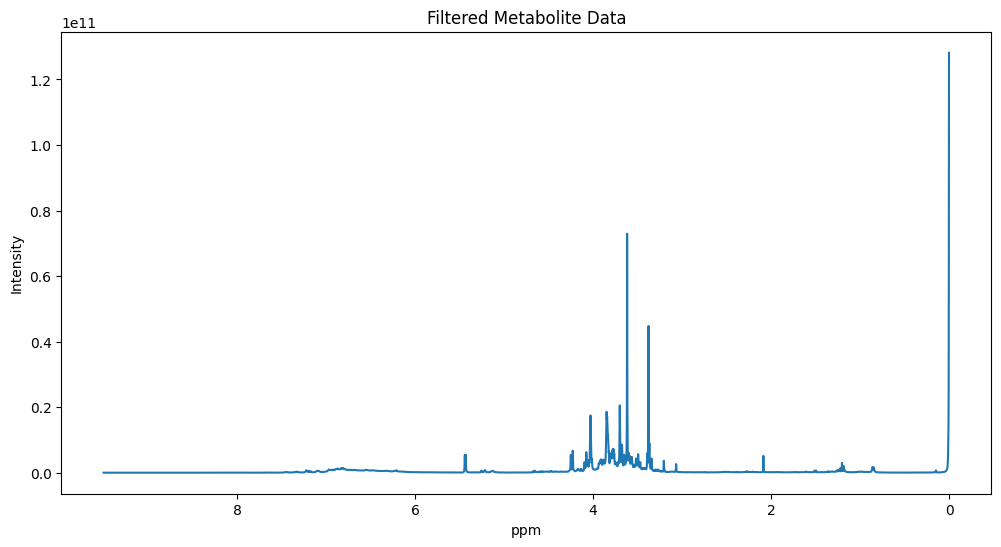

In [72]:
# แสดงกราฟข้อมูลที่ผ่านการกรอง
plt.figure(figsize=(12, 6))
plt.plot(ppm_filtered, X_filtered[0])
plt.xlabel('ppm')
plt.ylabel('Intensity')
plt.title('Filtered Metabolite Data')
plt.gca().invert_xaxis()
plt.show()

## Quantize data โดยลดจำนวนข้อมูล ให้เหลือเพียง 51 x 400 โดยรวมข้อมูลที่อยู่ข้างกันและเลือกค่า max X

In [73]:
def quantize_data(X, ppm, num_bins=400):
    # คำนวณขอบของแต่ละช่อง
    bin_edges = np.linspace(ppm.min(), ppm.max(), num_bins + 1)

    # หาว่าแต่ละค่า ppm อยู่ในช่องไหน
    bin_indices = np.digitize(ppm, bin_edges) - 1

    # เตรียมอาเรย์ X ที่ถูกควอนไทซ์
    X_quantized = np.zeros((X.shape[0], num_bins))

    # สำหรับแต่ละช่อง ใช้ค่า X สูงสุด
    for i in range(num_bins):
        mask = bin_indices == i
        if np.any(mask):
            X_quantized[:, i] = np.max(X[:, mask], axis=1)

    # คำนวณค่า ppm ใหม่ (จุดกึ่งกลางของแต่ละช่อง)
    ppm_quantized = (bin_edges[:-1] + bin_edges[1:]) / 2

    return X_quantized, ppm_quantized

# ใช้ฟังก์ชันควอนไทซ์
X_quantized, ppm_quantized = quantize_data(X_filtered, ppm_filtered)

print("รูปร่างของ X_quantized:", X_quantized.shape)
print("รูปร่างของ ppm_quantized:", ppm_quantized.shape)

รูปร่างของ X_quantized: (51, 400)
รูปร่างของ ppm_quantized: (400,)


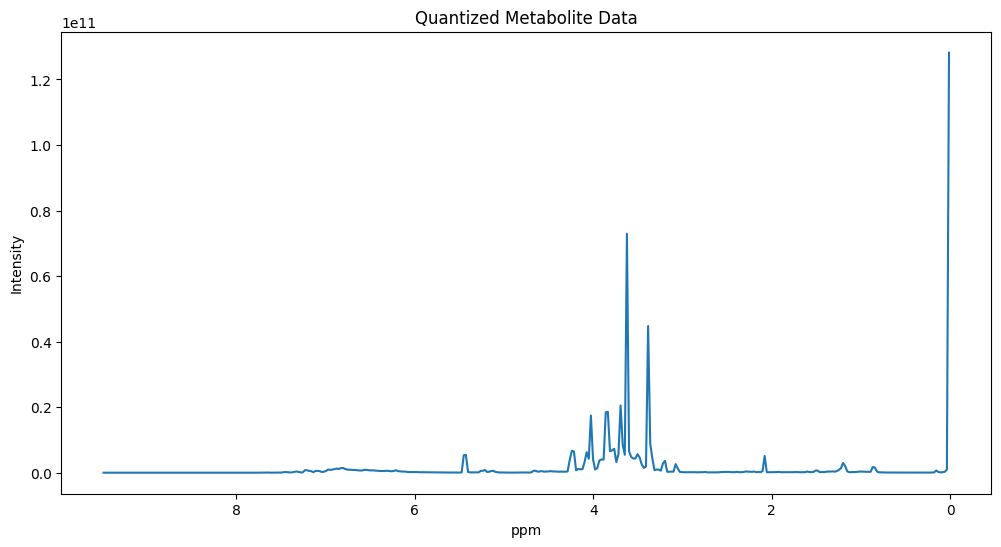

In [74]:
# แสดงกราฟข้อมูลที่ผ่านการควอนไทซ์
plt.figure(figsize=(12, 6))
plt.plot(ppm_quantized, X_quantized[0])
plt.xlabel('ppm')
plt.ylabel('Intensity')
plt.title('Quantized Metabolite Data')
plt.gca().invert_xaxis()
plt.show()

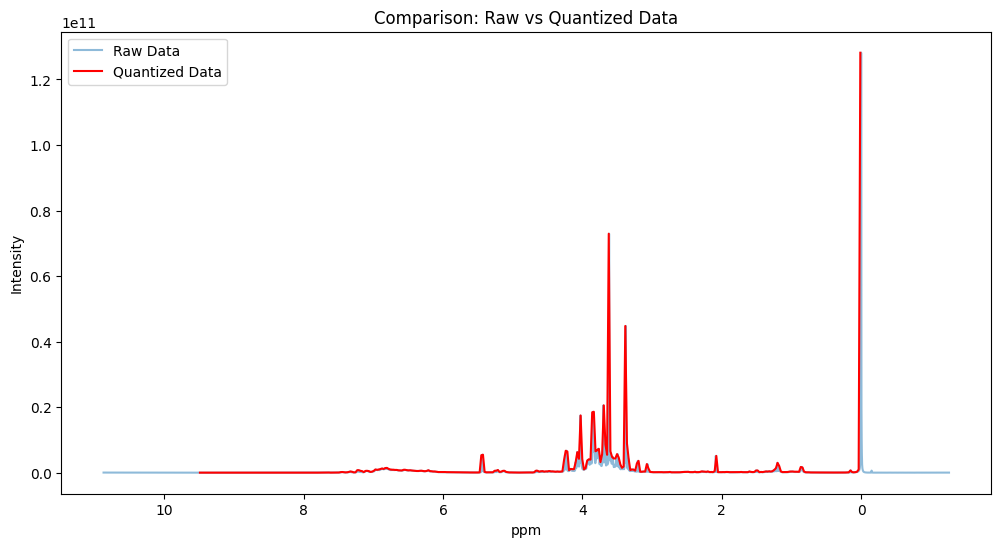

In [75]:
# แสดงกราฟเปรียบเทียบข้อมูลดิบและข้อมูลที่ผ่านการควอนไทซ์
plt.figure(figsize=(12, 6))
plt.plot(ppm, X[0], label='Raw Data', alpha=0.5)
plt.plot(ppm_quantized, X_quantized[0], label='Quantized Data', color='red')
plt.xlabel('ppm')
plt.ylabel('Intensity')
plt.title('Comparison: Raw vs Quantized Data')
plt.legend()
plt.gca().invert_xaxis()
plt.show()

# โจทย์

## 1.ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [77]:
# สร้างฟังก์ชันสำหรับพล็อตกราฟแสดงความแปรปรวนสะสม
def plot_cumulative_variance(pca):
    cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cum_var_exp) + 1), cum_var_exp, 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Cumulative Explained Variance vs. Number of Components')
    plt.grid(True)
    plt.show()

In [78]:
# ทำการ standardize ข้อมูล
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_quantized)

In [79]:
# ทำ PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

Explained variance ratio:
PC1: 0.5257
PC2: 0.1413
PC3: 0.1092
PC4: 0.0324
PC5: 0.0273
PC6: 0.0199
PC7: 0.0160
PC8: 0.0155
PC9: 0.0135
PC10: 0.0122


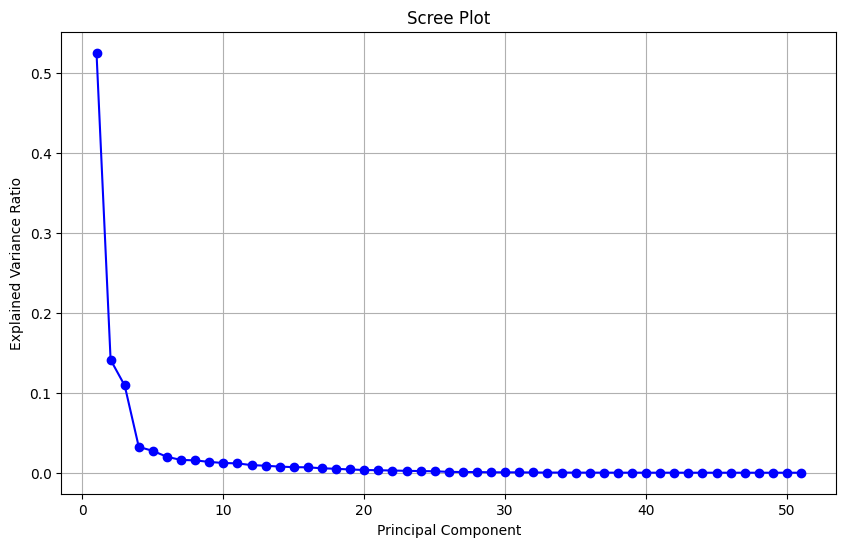

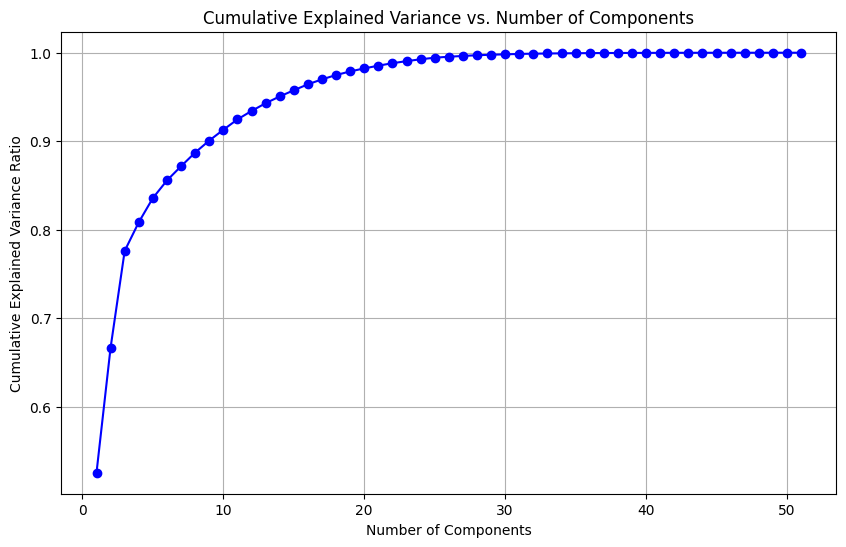

Number of components explaining 95% of variance: 14


In [80]:
# วิเคราะห์ผลลัพธ์ PCA

# แสดงความแปรปรวนที่อธิบายได้โดยแต่ละ component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:")
for i, ratio in enumerate(explained_variance_ratio[:10]):
    print(f"PC{i+1}: {ratio:.4f}")

# แสดงกราฟ scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# แสดงกราฟความแปรปรวนสะสม
plot_cumulative_variance(pca)

# หาจำนวน components ที่อธิบายความแปรปรวนได้ 95%
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of components explaining 95% of variance: {n_components_95}")

Top 10 loadings for PC1:
          ppm       PC1
65   1.555639  0.067151
248  5.901828  0.066209
60   1.436890  0.066152
76   1.816885  0.065956
75   1.793135  0.065862
66   1.579388  0.065856
239  5.688081  0.065684
191  4.548097  0.065662
245  5.830579  0.065360
71   1.698137  0.065253

Top 10 loadings for PC2:
          ppm       PC2
358  8.514291  0.113659
391  9.298030  0.112582
378  8.989284  0.111097
379  9.013034  0.110096
374  8.894285  0.110064
9    0.225657  0.109476
359  8.538040  0.109460
385  9.155532  0.109141
360  8.561790  0.109110
363  8.633039  0.108626


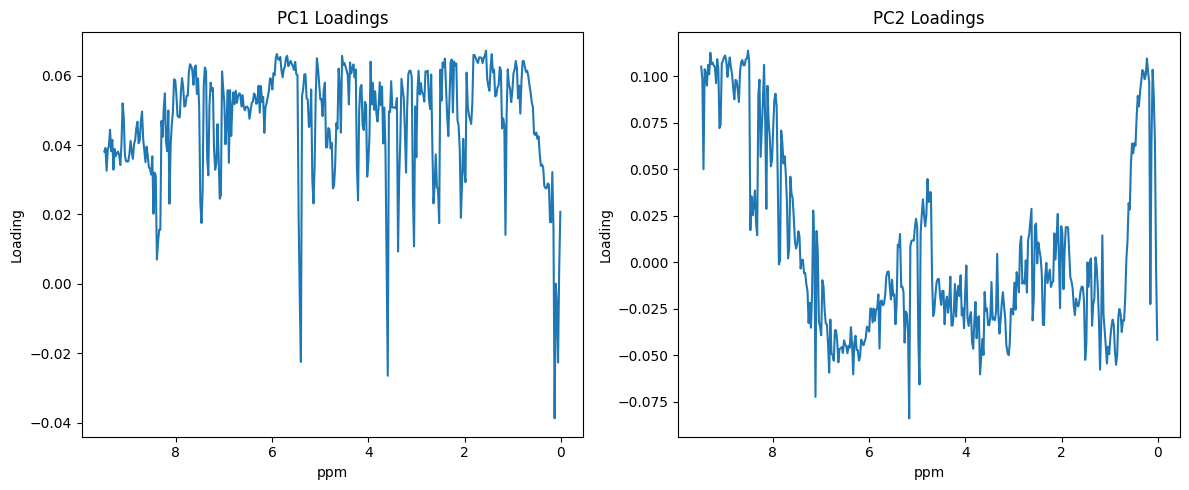

In [81]:
# วิเคราะห์ loadings ของ PCA

loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])
loadings_df['ppm'] = ppm_quantized

# แสดง top 10 loadings สำหรับ PC1 และ PC2
print("Top 10 loadings for PC1:")
print(loadings_df.sort_values(by='PC1', key=abs, ascending=False)[['ppm', 'PC1']].head(10))
print("\nTop 10 loadings for PC2:")
print(loadings_df.sort_values(by='PC2', key=abs, ascending=False)[['ppm', 'PC2']].head(10))

# พล็อตกราฟ loadings สำหรับ PC1 และ PC2
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loadings_df['ppm'], loadings_df['PC1'])
plt.xlabel('ppm')
plt.ylabel('Loading')
plt.title('PC1 Loadings')
plt.gca().invert_xaxis()

plt.subplot(1, 2, 2)
plt.plot(loadings_df['ppm'], loadings_df['PC2'])
plt.xlabel('ppm')
plt.ylabel('Loading')
plt.title('PC2 Loadings')
plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()

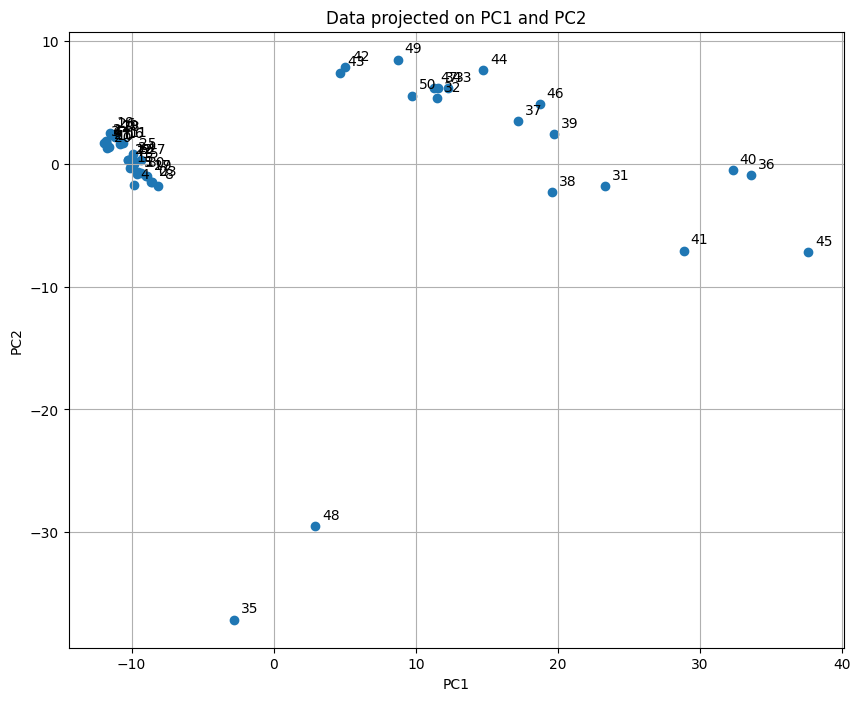

In [82]:
# แสดงผลการ project ข้อมูลลงบน PC1 และ PC2

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data projected on PC1 and PC2')
for i, (x, y) in enumerate(X_pca[:, :2]):
    plt.annotate(str(i), (x, y), xytext=(5, 5), textcoords='offset points')
plt.grid(True)
plt.show()

In [83]:
# สร้าง DataFrame เพื่อเก็บผลลัพธ์ PCA
pca_results = pd.DataFrame(X_pca[:, :5], columns=[f'PC{i+1}' for i in range(5)])
pca_results['Sample'] = range(len(X_pca))
print(pca_results.head())

         PC1       PC2       PC3       PC4       PC5  Sample
0  -8.635926 -1.521087 -2.894296 -2.037555 -0.162263       0
1  -9.550230 -0.709451 -2.185998 -0.624747  0.045991       1
2 -11.808258  1.880166 -0.947676 -0.022653 -0.588687       2
3 -11.953386  1.728043 -0.831103  0.087914 -0.481956       3
4  -9.852863 -1.769020 -1.090984 -1.073763  0.185096       4


ผลการวิเคราะห์ PCA พบว่า
1. การอธิบายความแปรปรวน
  - PC1 อธิบายความแปรปรวนได้ 52.57%
  - PC2 อธิบายความแปรปรวนได้ 14.13%
  - PC3 อธิบายความแปรปรวนได้ 10.92%

  จะได้ว่า เมื่อ 3 องค์ประกอบแรกรวมกันอธิบายความแปรปรวนได้ 77.62%

2. Scree Plot แสดงให้เห็นการลดลงอย่างรวดเร็วของความแปรปรวนที่อธิบายได้หลังจาก PC3 อาจจะใช้ 3-5 องค์ประกอบแรกในการวิเคราะห์ต่อไป

3. Cumulative Explained Variance พบว่าต้องใช้ 14 องค์ประกอบเพื่ออธิบายความแปรปรวน 95% แต่การใช้องค์ประกอบจำนวนมากอาจไม่จำเป็นและอาจทำให้โมเดลซับซ้อนเกินไป

4. Loadings
  - PC1: มี loadings สูงสุดที่ ppm ประมาณ 1.56, 5.90, 1.44, 1.82
  - PC2: มี loadings สูงสุดที่ ppm ประมาณ 8.51, 9.30, 9.01, 8.89
  loadings เหล่านี้อาจบ่งชี้ถึงตำแหน่ง ppm ที่มีความสำคัญในการจำแนกกลุ่มตัวอย่าง

5. การ Project ข้อมูลบน PC1 และ PC2 สามารถเห็นกลุ่มของตัวอย่างที่มีลักษณะคล้ายกันอยู่ใกล้กัน
แต่มีตัวอย่างบางตัวที่แยกออกมาอย่างชัดเจน เช่น ตัวอย่างหมายเลข 35, 48

สรุป จะพิจารณาใช้ PC1 กับ PC2 เนื่องจากสามารถอธิบายความแปรปรวนของข้อมูลได้ 66.70% และแสดงผลในรูปแบบ 2 มิติได้ง่าย

## 2.visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น

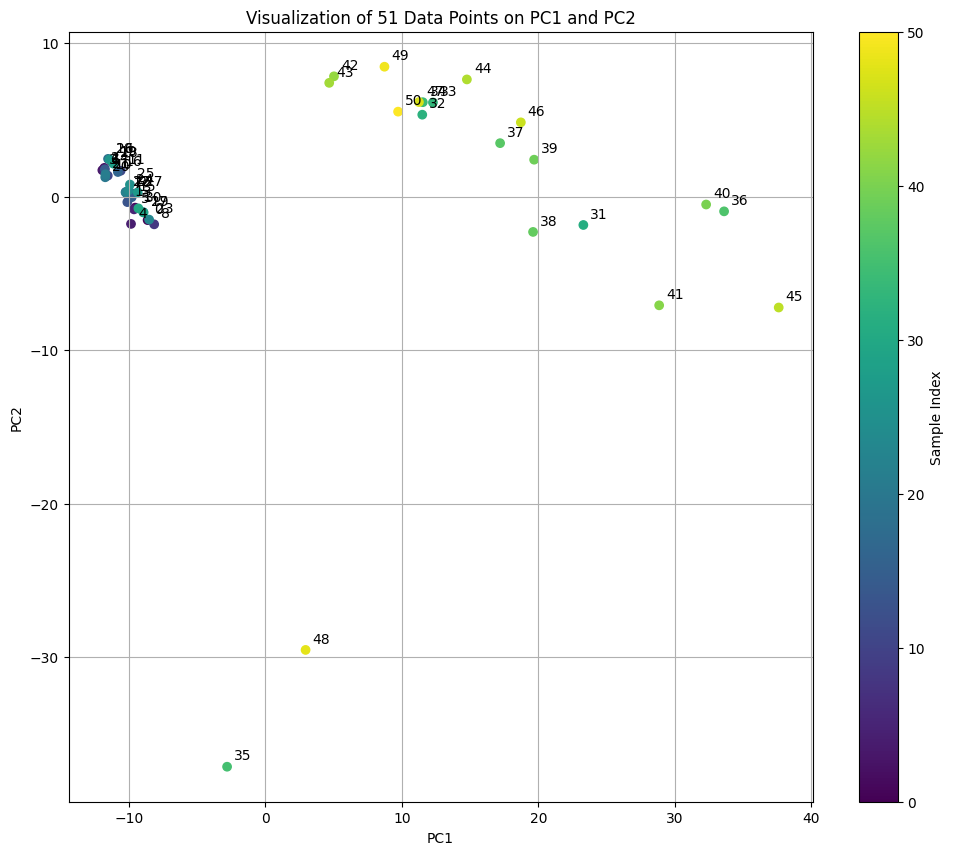

ค่าต่ำสุดและสูงสุดของ PC1: -11.953385620500061 37.61181993254123
ค่าต่ำสุดและสูงสุดของ PC2: -37.12169820516547 8.468063858197857
ค่าเฉลี่ยของ PC1: -4.527968414157501e-16
ค่าเฉลี่ยของ PC2: -1.7415263131375004e-16


In [84]:
import matplotlib.pyplot as plt

# สร้างกราฟ scatter plot ของข้อมูลทั้ง 51 จุดบน PC1 และ PC2
plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=range(len(X_pca)), cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualization of 51 Data Points on PC1 and PC2')
plt.colorbar(scatter, label='Sample Index')

# เพิ่มหมายเลขกำกับให้แต่ละจุด
for i, (x, y) in enumerate(X_pca[:, :2]):
    plt.annotate(str(i), (x, y), xytext=(5, 5), textcoords='offset points')

plt.grid(True)
plt.show()

# แสดงข้อมูลเพิ่มเติมเกี่ยวกับการกระจายตัวของข้อมูล
print("ค่าต่ำสุดและสูงสุดของ PC1:", X_pca[:, 0].min(), X_pca[:, 0].max())
print("ค่าต่ำสุดและสูงสุดของ PC2:", X_pca[:, 1].min(), X_pca[:, 1].max())
print("ค่าเฉลี่ยของ PC1:", X_pca[:, 0].mean())
print("ค่าเฉลี่ยของ PC2:", X_pca[:, 1].mean())

## 3.ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี

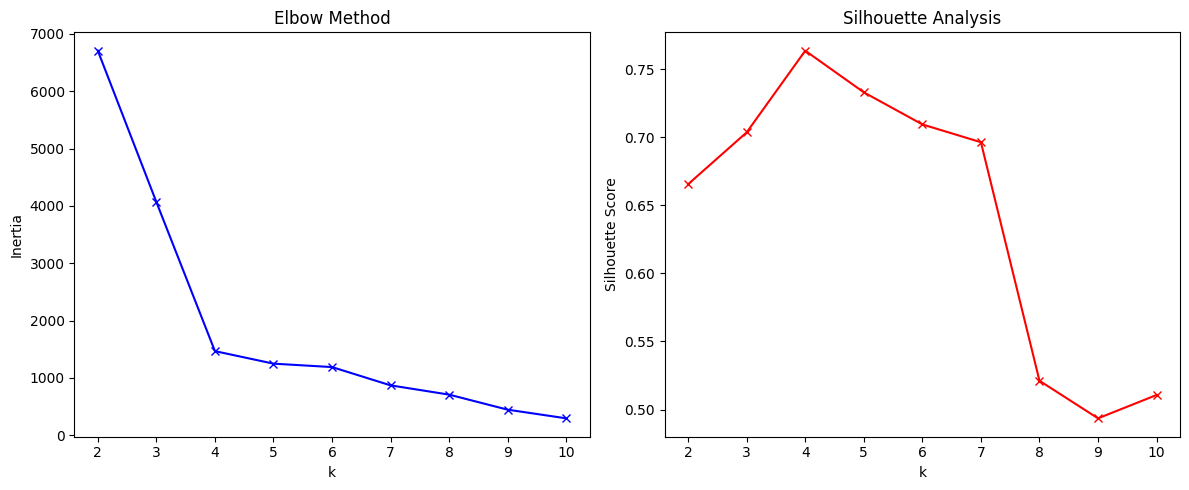

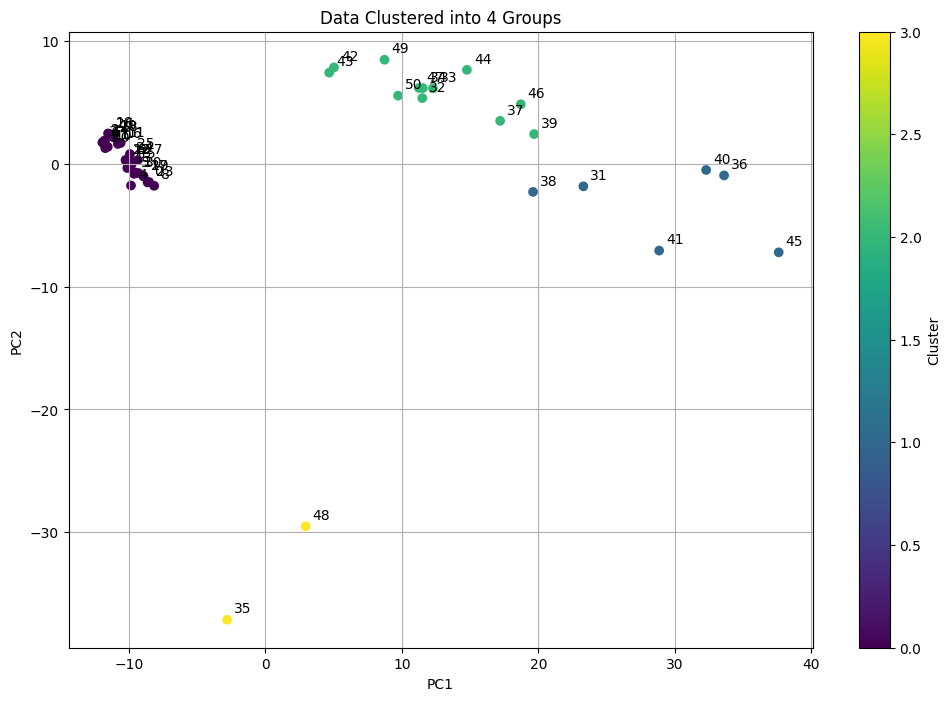

จำนวนตัวอย่างในกลุ่ม 0: 31
จำนวนตัวอย่างในกลุ่ม 1: 6
จำนวนตัวอย่างในกลุ่ม 2: 12
จำนวนตัวอย่างในกลุ่ม 3: 2


In [85]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# ใช้ 2 หรือ 3 principal components แรกสำหรับการ clustering
X_cluster = X_pca[:, :3]

# ทำ Elbow method
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster, kmeans.labels_))

# Plot Elbow curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot Silhouette scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.tight_layout()
plt.show()

# เลือกจำนวนกลุ่มที่เหมาะสม (ปรับตามผลที่ได้จากกราฟ)
optimal_k = 4  # จากกราฟ Elbow Method และกราฟ Silhouette scores

# ทำ K-means clustering ด้วยจำนวนกลุ่มที่เหมาะสม
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_cluster)

# Plot ผลลัพธ์การจัดกลุ่ม
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Data Clustered into {optimal_k} Groups')
plt.colorbar(scatter, label='Cluster')

# เพิ่มหมายเลขกำกับให้แต่ละจุด
for i, (x, y) in enumerate(X_pca[:, :2]):
    plt.annotate(str(i), (x, y), xytext=(5, 5), textcoords='offset points')

plt.grid(True)
plt.show()

# แสดงจำนวนตัวอย่างในแต่ละกลุ่ม
for i in range(optimal_k):
    print(f"จำนวนตัวอย่างในกลุ่ม {i}: {sum(cluster_labels == i)}")

1. จำนวนกลุ่มที่เหมาะสม: จากกราฟ Elbow Method และ Silhouette Analysis, เราเห็นว่าค่า k=4 ให้ผลลัพธ์ที่ดีที่สุด:
  - Elbow Method แสดงจุดหักศอกที่ k=4
  - Silhouette Score สูงสุดที่ k=4

2. การจัดกลุ่มข้อมูล: ข้อมูลถูกแบ่งออกเป็น 4 กลุ่ม ตามสีที่แสดงในกราฟ:
  - กลุ่ม 0 (สีม่วงเข้ม): 31 ตัวอย่าง - กลุ่มใหญ่ที่สุด อยู่ทางซ้ายของกราฟ
  - กลุ่ม 1 (สีฟ้า): 6 ตัวอย่าง - กระจายตัวทางขวาของกราฟ
  - กลุ่ม 2 (สีเขียว): 12 ตัวอย่าง - อยู่ตรงกลางค่อนไปทางขวาบนของกราฟ
  - กลุ่ม 3 (สีเหลือง): 2 ตัวอย่าง - outliers (ตัวอย่างที่ 35 และ 48)

3. ลักษณะเด่นของแต่ละกลุ่ม:
  - กลุ่ม 0: เป็นกลุ่มหลักที่มีความหนาแน่นสูง แสดงถึงลักษณะทั่วไปของข้อมูลส่วนใหญ่
  - กลุ่ม 1 และ 2: แสดงถึงตัวอย่างที่มีลักษณะแตกต่างจากกลุ่มหลัก อาจมีคุณสมบัติพิเศษบางอย่าง
  - กลุ่ม 3: เป็น outliers ที่มีลักษณะแตกต่างอย่างมากจากตัวอย่างอื่นๆ

สรุป: ข้อมูลชุดนี้สามารถแบ่งออกเป็น 4 กลุ่ม​ โดยที่จะตั้งชื่อกลุ่มว่า
  - กลุ่ม 0 : กลุ่ม "Typical Metabolite Profile"

  เหตุผล: เป็นกลุ่มที่มีจำนวนตัวอย่างมากที่สุด น่าจะแสดงถึงลักษณะทั่วไปของ metabolite profiles

  - กลุ่ม 1 : กลุ่ม "High PC1 Metabolites"

  เหตุผล: กลุ่มนี้มีค่า PC1 สูงกว่ากลุ่มอื่นๆ ซึ่งอาจบ่งชี้ถึงความเข้มข้นสูงของ metabolites บางชนิด

  - กลุ่ม 2 : กลุ่ม "Intermediate Metabolite Profile"

  เหตุผล: กลุ่มนี้อยู่ระหว่างกลุ่มหลักและกลุ่ม High PC1 อาจมีลักษณะผสมผสาน

  - กลุ่ม 3 : กลุ่ม "Distinct Metabolite Outliers"

  เหตุผล: เป็นกลุ่มที่แตกต่างอย่างชัดเจนจากกลุ่มอื่นๆ อาจมีลักษณะ metabolite profiles ที่ผิดปกติหรือพิเศษ


## 4.สร้าง ตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน

In [86]:
# สร้าง DataFrame
df = pd.DataFrame({
    'Sample': range(len(cluster_labels)),
    'Cluster': cluster_labels
})

# สร้างฟังก์ชันสำหรับแปลงหมายเลขกลุ่มเป็นชื่อกลุ่ม
def get_cluster_name(cluster):
    if cluster == 0:
        return "Typical Metabolite Profile"
    elif cluster == 1:
        return "High PC1 Metabolites"
    elif cluster == 2:
        return "Intermediate Metabolite Profile"
    elif cluster == 3:
        return "Distinct Metabolite Outliers"
    else:
        return "Unknown"

# เพิ่มคอลัมน์ Cluster Name
df['Cluster Name'] = df['Cluster'].apply(get_cluster_name)

# แสดงตาราง
print(df.to_string(index=False))

# สรุปจำนวนตัวอย่างในแต่ละกลุ่ม
print("\nSummary:")
df['Cluster Name'].value_counts()

 Sample  Cluster                    Cluster Name
      0        0      Typical Metabolite Profile
      1        0      Typical Metabolite Profile
      2        0      Typical Metabolite Profile
      3        0      Typical Metabolite Profile
      4        0      Typical Metabolite Profile
      5        0      Typical Metabolite Profile
      6        0      Typical Metabolite Profile
      7        0      Typical Metabolite Profile
      8        0      Typical Metabolite Profile
      9        0      Typical Metabolite Profile
     10        0      Typical Metabolite Profile
     11        0      Typical Metabolite Profile
     12        0      Typical Metabolite Profile
     13        0      Typical Metabolite Profile
     14        0      Typical Metabolite Profile
     15        0      Typical Metabolite Profile
     16        0      Typical Metabolite Profile
     17        0      Typical Metabolite Profile
     18        0      Typical Metabolite Profile
     19        0    

,count
Cluster Name,
Typical Metabolite Profile,31
Intermediate Metabolite Profile,12
High PC1 Metabolites,6
Distinct Metabolite Outliers,2


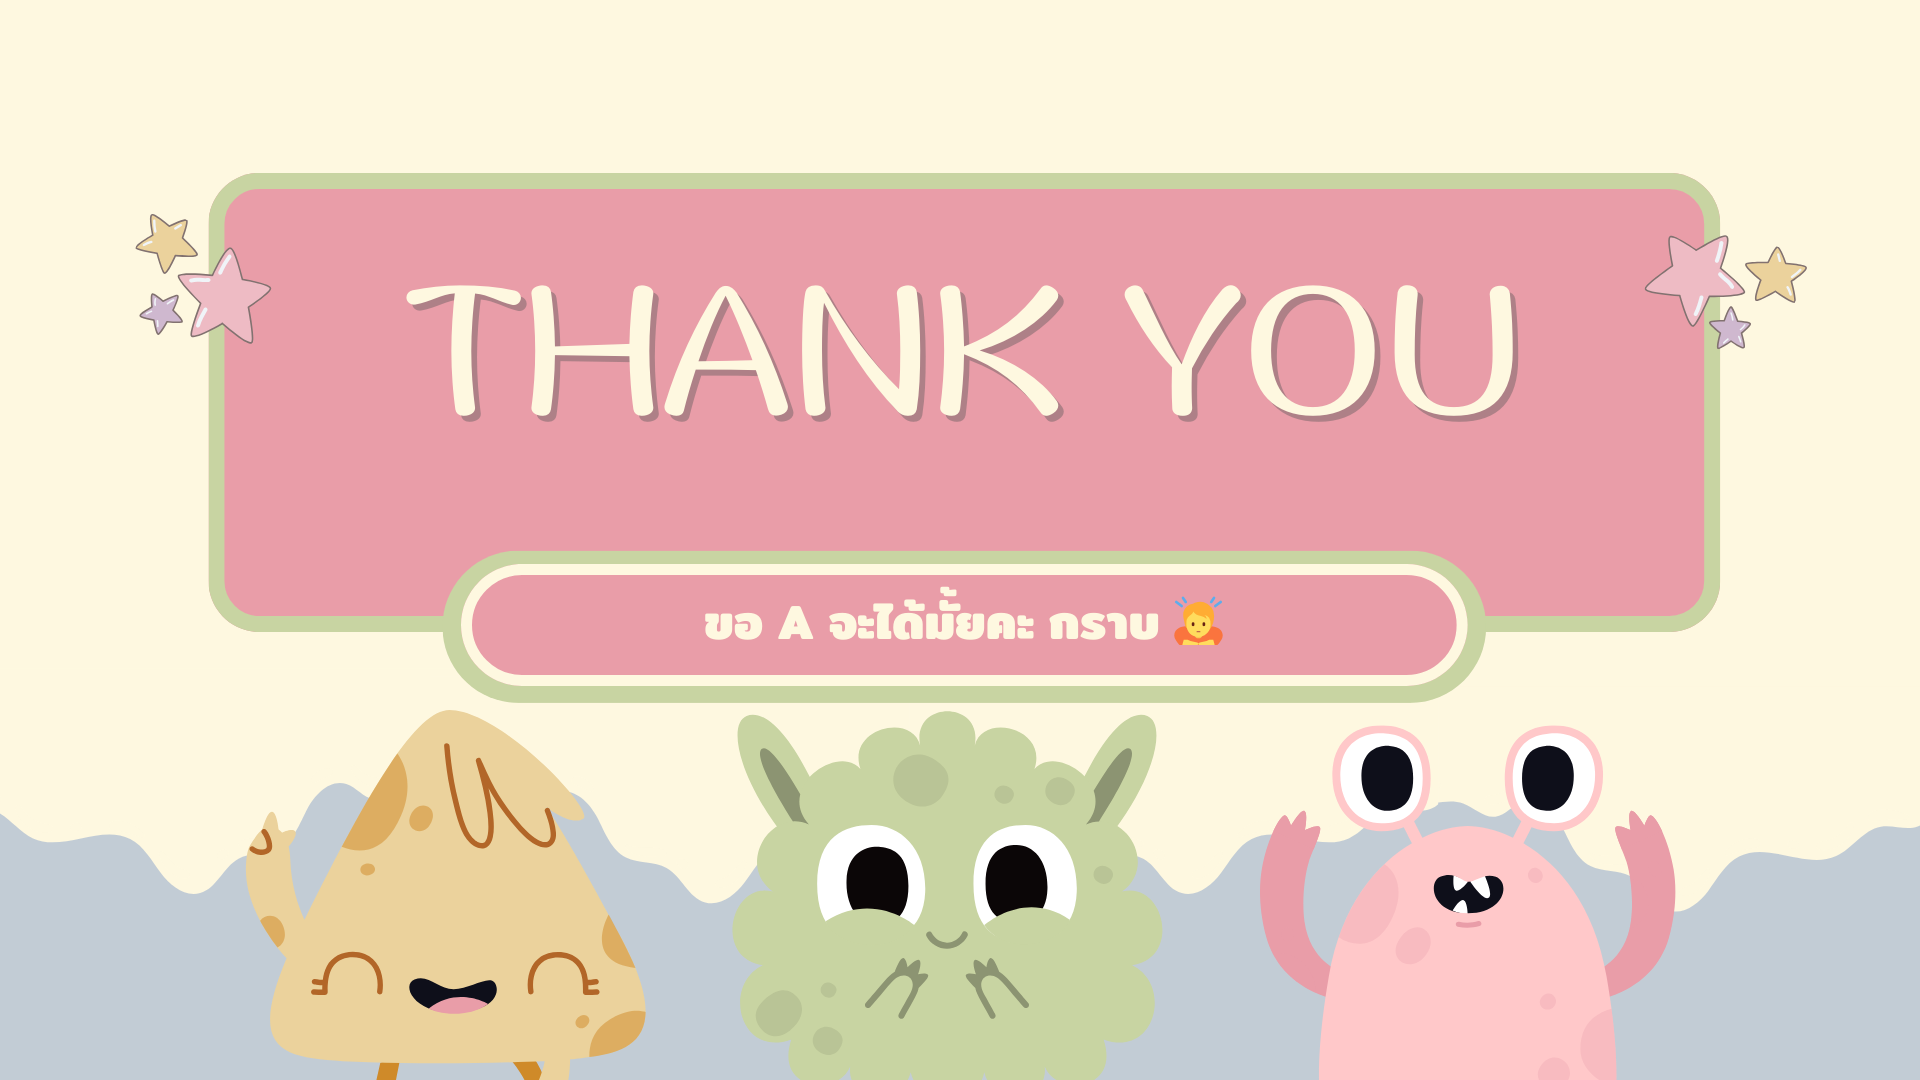